In [76]:
#OUBADRISS ADIB
#InceptionV3 and VGG16 Grape Leaves disease detection
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model

In [1]:
pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 10.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


This dataset was taken from this Kaggle link. https://www.kaggle.com/datasets/lavaman151/plantifydr-dataset

In [3]:
img1 =image.load_img('./Grape/train/Grape Black Measles/GrapeBlackMeasles(1).JPG')

In [24]:
train_dir ='./Grape/train' 
test_dir = './Grape/test'

In [5]:
# Checking the image dimensions with opencv

cv2.imread('./Grape/train/Grape Black Measles/GrapeBlackMeasles(4).JPG').shape

(256, 256, 3)

Building the model.

First, we'll download the InceptionV3 and VGG-16 models from tensorflow keras applications that we imported earlier and store it in a variable.

We don't want to include the last layer because its trained to classify 1000 classes of images. Our data has only 2 classes.

In [37]:
input_shape = (224, 224, 3)

vgg16 = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

#inception = tf.keras.applications.inception_v3.InceptionV3(
   # include_top=False,
   # weights='imagenet',
   # input_shape=input_shape
#)

58889256/58889256 [==============================] - 19s 0us/step


Freezing some of the InceptionV3 layers.
All the layers in InceptionV3 come as trainable by default. This means that we have to train all the layers completely from scratch. This will be a lot of computation. Using transfer learning, we want to retain the trained weights of the model and only train a few layers along with our added model layers.

In this case, we will set all layers to non-trainable.

In [38]:
#for layer in inception.layers:
 #   layer.trainable = False
    
for layer in vgg16.layers:
    layer.trainable = False

Preprocess training image data.

Here, we'll load in our data using ImageDataGenerator Class in tensorflow. This allows us to rescale our images and split the data into train and validation data. It also loads our images in a specified batch size.

In [39]:
IMAGE_SIZE = [224, 224]

train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )
val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )  


train_set = train_gen.flow_from_directory(
    train_dir,
    subset = 'training',
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
)

val_set = val_gen.flow_from_directory(
    train_dir,
    subset = 'validation',
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
    )

Found 10563 images belonging to 4 classes.
Found 2638 images belonging to 4 classes.


Building the model.

We'll build a small model as the top for the InceptionV3 and VGG-16 because we didn't include the top which is the last layer.

In [42]:
#InceptionV3 Model
#x = Flatten()(inception.output)
#output_layer = Dense(4, activation='softmax')(x)
#model1 = Model(inputs=inception.input, outputs=output_layer)

#VGG-16 Model
x = Flatten()(vgg16.output)
output_layer = Dense(4, activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=output_layer)

In [44]:
# Checking the final model.

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [45]:
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    metrics=['accuracy']
    )

In [48]:
Vgg16_model = model.fit_generator(
     train_set,
     validation_data=val_set, 
     epochs=5,
     steps_per_epoch = len(train_set),
     validation_steps = len(val_set),)

Epoch 1/5


/var/folders/87/5ylh42k5731_kbmw9pws03fc0000gn/T/ipykernel_33131/2510501101.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  Vgg16_model = model.fit_generator(
2023-09-26 22:48:17.435149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


661/661 [==============================] - ETA: 0s - loss: 0.7932 - accuracy: 0.7533

2023-09-26 22:51:11.283622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


661/661 [==============================] - 217s 327ms/step - loss: 0.7932 - accuracy: 0.7533 - val_loss: 0.4901 - val_accuracy: 0.8760
Epoch 2/5
661/661 [==============================] - 217s 328ms/step - loss: 0.4000 - accuracy: 0.9036 - val_loss: 0.3251 - val_accuracy: 0.9151
Epoch 3/5
661/661 [==============================] - 218s 330ms/step - loss: 0.2904 - accuracy: 0.9252 - val_loss: 0.2558 - val_accuracy: 0.9314
Epoch 4/5
661/661 [==============================] - 220s 332ms/step - loss: 0.2350 - accuracy: 0.9369 - val_loss: 0.2167 - val_accuracy: 0.9428
Epoch 5/5
661/661 [==============================] - 217s 329ms/step - loss: 0.1999 - accuracy: 0.9449 - val_loss: 0.1897 - val_accuracy: 0.9492


In [49]:
model.save('VGG16_grape_leaves-OUBADRISS.h5')

Preprocess test image data.

In the case of the test images, we'll only rescale the images and generate the batches.

In [56]:
test_gen = ImageDataGenerator(rescale=1./255)

In [57]:
test_set = test_gen.flow_from_directory(
    test_dir,
    class_mode = 'categorical',
    target_size = IMAGE_SIZE,
    batch_size = 16
)

Found 7395 images belonging to 3 classes.


In [58]:
Vgg16_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

 Evaluating our model.

Here, we'll plot the accuracy and loss for both training and validation data.

In [66]:
#InceptionV3
acc = inception_model.history['accuracy']
val_acc = inception_model.history['val_accuracy']

loss = inception_model.history['loss']
val_loss = inception_model.history['val_loss']

In [72]:
print('Accuracy : ',acc)
print('Loss : ',loss)

Accuracy :  [0.8828931450843811, 0.9665814638137817, 0.9796459078788757, 0.9884502291679382, 0.9927104115486145]
Loss :  [0.3427208662033081, 0.11368919163942337, 0.0740777999162674, 0.05338494852185249, 0.03958900272846222]


In [73]:
#VGG16
acc = Vgg16_model.history['accuracy']
val_acc = Vgg16_model.history['val_accuracy']

loss = Vgg16_model.history['loss']
val_loss = Vgg16_model.history['val_loss']

In [74]:
print('Accuracy : ',acc)
print('Loss : ',loss)

Accuracy :  [0.7532897591590881, 0.9036258459091187, 0.9252106547355652, 0.9368550777435303, 0.9449020028114319]
Loss :  [0.7932180166244507, 0.4000457227230072, 0.2904047667980194, 0.2350081354379654, 0.19985435903072357]


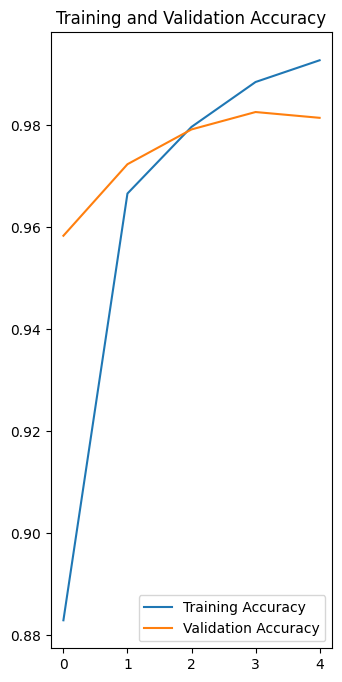

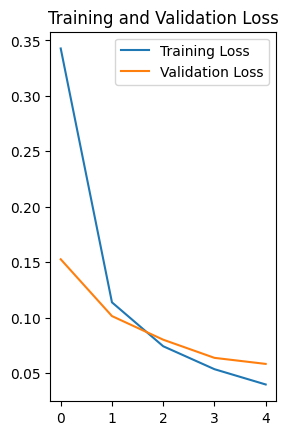

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

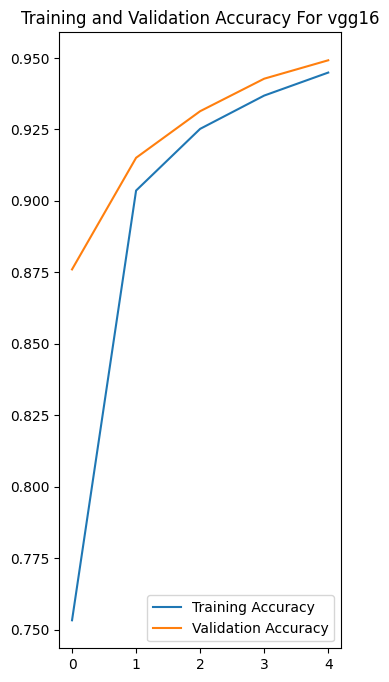

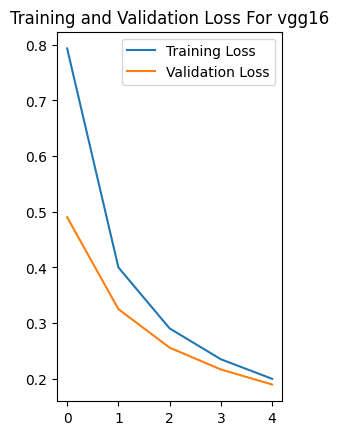

In [53]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(5), acc, label='Training Accuracy')
plt.plot(range(5), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy For vgg16')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(range(5), loss, label='Training Loss')
plt.plot(range(5), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss For vgg16')
plt.show()

Making predictions with test images.

In [59]:
predictions = model.predict(test_set)

2023-09-26 23:12:45.310790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


463/463 [==============================] - 121s 262ms/step


In [60]:
y_pred = np.argmax(predictions, axis=-1)

ImageDataGenerator infers the class labels from the directories name. We want to check the class labels.

In [61]:
test_set.class_indices

{'Grape Black Measles': 0, 'Grape Black rot': 1, 'Grape Healthy': 2}

We want to evaluate our model's performance with the test images.

In [63]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image


# Specify the path to the image you want to predict
image_path = './Grape/test/black-rot-of-grape_figure-1.jpg'  # Change this to the path of your test image

# Load your saved model
model = tf.keras.models.load_model('./VGG16_grape_leaves-OUBADRISS.h5')

# Define a function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Make sure to use the same target size as during training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to the range [0, 1]
    return img_array


# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Assuming you have a list of class labels
class_labels = ['Black measles', 'Black rot', 'Healthy','Isariopsis']  # Replace with your class labels

# Get the predicted class
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]

# Print the predicted class and the confidence score
print(f"Predicted class: {predicted_class}")
print(f"Confidence score: {predictions[0][predicted_class_index]}")


1/1 [==============================] - 0s 247ms/step
Predicted class: Healthy
Confidence score: 0.6908560991287231


2023-09-26 23:16:06.205341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# Load and compile your model
model = tf.keras.models.load_model('./VGG16_grape_leaves-OUBADRISS.h5')

# Load the training history (if it was saved during training)
try:
    import pickle

    with open('training_history.pkl', 'rb') as history_file:
        training_history = pickle.load(history_file)

    # Access accuracy and loss from the training history
    accuracy = training_history['accuracy']  # Replace with the actual key used in your history
    loss = training_history['loss']          # Replace with the actual key used in your history

    print(f'Accuracy: {accuracy[-1] * 100:.2f}%')
    print(f'Loss: {loss[-1]:.4f}')
except FileNotFoundError:
    print("Training history file not found.")

Training history file not found.
